# misura costante $\varepsilon_0$

di seguito vengono fatte due stime per la costante dielettrica assoluta:
la prima è basata su misure con distanza variabile (PARTE B) mentre la seconda misure a distanza fissa (PARTE A)

$F = \frac{1}{4\pi\varepsilon_0\varepsilon_d}\frac{Q_1Q_1}{d^2} \quad \oplus \quad F = K_{tor}\theta \quad \oplus \quad Q = CV = 4\pi\varepsilon_0\varepsilon_r aV$
<span style='font-size:12px'>a = raggio della sfera</span>

assumendo $\varepsilon_d$ trascurabile otteniamo:

$\mathbf{\theta = \frac{4\pi\varepsilon_0 a^2}{K_{tor}}\frac{V_1V_2}{d^2}}$

In [38]:
import numpy as np
from interpolazione3 import final_val

COSTANTE_DI_TORSIONE = 8.705110844840937e-05 # da torsione PARTE C
sigma_COSTANTE_DI_TORSIONE = 2.872700601623965e-07

raggio = 0.017 # m

### distanza variabile $\theta \propto \frac{1}{d^2}$:

$B = \frac{4\pi\varepsilon_0a^2V_1V_2}{K_{tor}} \Rightarrow \varepsilon_0 = \frac{K_{tor}B}{4\pi a^2V_1V_2}$

In [39]:
distanza_variabile_B = 0.012433912099555739 #B
sigma_distanza_variabile_B = 0.00030288795101482175 #sigmaB

EPSILON1 = COSTANTE_DI_TORSIONE * distanza_variabile_B / (4*np.pi*6000*6000*raggio**2)
sigmaEPSILON1 = EPSILON1 * np.sqrt((sigma_COSTANTE_DI_TORSIONE/COSTANTE_DI_TORSIONE)**2+(sigma_distanza_variabile_B/distanza_variabile_B)**2)
print('Epsilon0 distanza variabile: ',final_val(EPSILON1,sigmaEPSILON1,exp=-12))

Epsilon0 distanza variabile:  (8.28 ± 0.2)e-12 


### tensione variabile $\theta \propto V_1V_2$:

$B = \frac{4\pi\varepsilon_0a^2}{K_{tor}d^2} \Rightarrow \varepsilon_0 = \frac{K_{tor}B d^2}{4\pi a^2}$

In [40]:
tensione_variabile_B = 3.598408064946805e-08 #B
sigma_tensione_variabile_B = 4.895069850371449e-10 #sigmaB
d = 0.1 #m
EPSILON2 = (tensione_variabile_B * COSTANTE_DI_TORSIONE * d**2)/(4*np.pi*np.power(raggio,2))
sigmaEPSILON2 = EPSILON2 * np.sqrt((sigma_COSTANTE_DI_TORSIONE/COSTANTE_DI_TORSIONE)**2+(sigma_tensione_variabile_B/tensione_variabile_B)**2)
print('Epsilon0 tensione variabile: ',final_val(EPSILON2,sigmaEPSILON2,exp=-12))

Epsilon0 tensione variabile:  (8.63 ± 0.12)e-12 


## VERIFICA COMPATIBILITÀ

segue verifica della compatibilità del valore ottenuto dai due differenti metodi sperimentali:

In [41]:
from interpolazione3 import probability_under_norm
t = np.abs(EPSILON1-EPSILON2) / np.sqrt(sigmaEPSILON2**2 + sigmaEPSILON1**2)

print(f'T-test: t={np.round(t,1)}')
print(f'Compatibilità: {np.round((1-probability_under_norm(0,1,t))*100,1)}% >> 5%')


T-test: t=1.5
Compatibilità: 14.4% >> 5%


### confronto con valore atteso

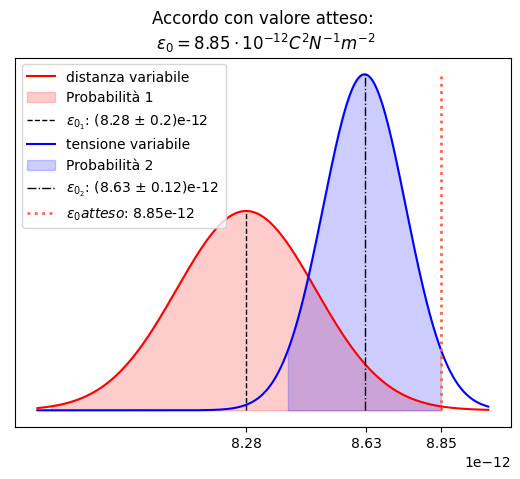

Accordo in percentuale Kater: 0.5% << 5%
(distanza in sigma: 2.81)
errore relativo percentuale: 2.5% << 5%

Accordo in percentuale cadura libera: 6% >> 5%
(distanza in sigma: 1.86)
errore relativo percentuale: 1.4% << 5%



In [47]:
EA = 8.85e-12 # epsilon atteso

from interpolazione3 import probability_under_norm, decimal_val
import matplotlib.pyplot as plt
import scipy.stats as sc
import numpy as np

E1,sE1 = EPSILON1,sigmaEPSILON1
E2,sE2 = EPSILON2,sigmaEPSILON2

plt.title('Accordo con valore atteso:\n $\epsilon_0 = 8.85\cdot 10^{-12} C^2N^{-1}m^{-2}$')

x = np.linspace(min(E1-3*sE1,E2-3*sE2),max(E1+3*sE1,E2+3*sE2),1000)

R = sc.norm.pdf(x,loc=E1,scale=sE1)
plt.plot(x,R, color='red', label='distanza variabile')
t = np.abs(E1 - EA) / sE1
plt.fill_between(x= x,y1= R,where= (E1- t*sE1 < x)&(x < E1 + t*sE1),color= "red",alpha= 0.2,label='Probabilità 1')
plt.vlines(x=E1,ymin=0,ymax=max(R),linewidths=1.0,label="$\epsilon_{0_1}$"+f": {final_val(E1,sE1,exp=-12)}", color='black',linestyle="--")

B = sc.norm.pdf(x,loc=E2,scale=sE2)
plt.plot(x,B, color='blue', label='tensione variabile')
t = np.abs(E2 - EA) / sE2
plt.fill_between(x= x,y1= B,where= (E2- t*sE2 < x)&(x < E2 + t*sE2),color= "blue",alpha= 0.2,label='Probabilità 2')
plt.vlines(x=E2,ymin=0,ymax=max(B),linewidths=1.0,label="$\epsilon_{0_2}$"+f": {final_val(E2,sE2,exp=-12)}", color='black',linestyle="-.")

plt.vlines(x=EA,ymax=max(B),ymin=0,linewidths=2.0,label="$\epsilon_{0} atteso$"+f": {decimal_val(EA,exp=-12)}", color='#FF6347',linestyle="dotted")

plt.xticks(np.round([E1,E2,EA],14))
plt.yticks([])
plt.legend()
plt.show()

p = np.round((1-probability_under_norm(E1,sE1,EA))*100,1)
print(f'Accordo in percentuale Kater: {p}% << 5%')
print(f'(distanza in sigma: {np.round(np.abs(E1 - EA) / sE1,2)})')
print(f'errore relativo percentuale: {np.round(sE1/E1*100,1)}% << 5%\n')

p = (1-probability_under_norm(E2,sE2,EA))*100
print(f'Accordo in percentuale cadura libera: {int(p)}% >> 5%')
print(f'(distanza in sigma: {np.round(np.abs(E2 - EA) / sE2,2)})')
print(f'errore relativo percentuale: {np.round(sE2/E2*100,1)}% << 5%\n')